<a href="https://colab.research.google.com/github/Rajashekar-Anumalla/PlayStoreAppReview_DataWrangling/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Loading file into colab

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/New/PlayStoreAppReview/Copy of Play Store Data.csv')

df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


## My Hypothesis is to group the category of the App in given dataset and then getting average rating for that particular category , similar I want to get the top most caterogy of APP which were installed most.

## Before that i need to clean the data so starting with Analysis over the given dataset

In [5]:
df_copy = df.copy() #copying complete dataset


In [6]:
df_copy.describe() # To know Central limit of columns contatining numeric values

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## in the above code block we found Rating column has more number of missing values to be handle 

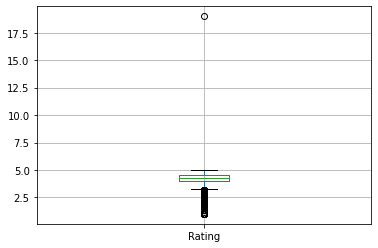

In [9]:
df_copy.boxplot() #to see whether are there any outlier

In [10]:
df_copy[df_copy['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [50]:
len(df['App'][10472])

39

In [64]:
# I found in record 10472 all the field values are shifted towards left
# so i make a try to set them and if i am unsuccessful will drop the record


col = list(df.columns)


idx = df_copy.index[df['Rating'] > 5].tolist()[0]
df_copy['Rating'][idx] = df[col[1]][idx]
df_copy[col[0]][idx] = df[col[0]][idx][0:16]
df_copy[col[1]][idx] = df[col[0]][idx][16:40]

for j in range(2,len(col)-1):
  df_copy[col[j+1]][idx] = df[col[j]][idx]
  
df_copy[idx:idx+1]


# df_copy[col[0]][df_copy.index[df_copy['Rating'] > 5].tolist()[0]][0:16]
# the above code in statement,
# I had took concept help from google to get the index of particular record


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi,Touchscreen Photo Frame,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


##grouping the category field of the App in given dataset and then getting average over rating field for that particular category field

In [65]:
df.groupby('Category',as_index=False)['Rating'].mean()


,Category,Rating
0,1.9,19.000000
1,ART_AND_DESIGN,4.358065
2,AUTO_AND_VEHICLES,4.190411
3,BEAUTY,4.278571
4,BOOKS_AND_REFERENCE,4.346067
5,BUSINESS,4.121452
6,COMICS,4.155172
7,COMMUNICATION,4.158537
8,DATING,3.970769
9,EDUCATION,4.389032
